In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import os
path = "/content/drive/MyDrive/os/dataset"
os.chdir(path)

import pandas as pd
files = os.listdir()

files

['sqli-extended.csv',
 'clean_sql_dataset.csv',
 'sqliv2.csv',
 'SQLiV3.csv',
 'sqli.csv',
 'sql_injection_dataset.csv',
 'Modified_SQL_Dataset.csv',
 'SQL_Dataset.csv']

In [3]:
dataframes = []

for f in files:
  print(f, type(f))
  if (f in ['sqliv2.csv', 'sqli.csv']):
    df = pd.read_csv(f, encoding='utf-16')
  else:
    df = pd.read_csv(f)


  # Update Columns Name to Query and Label
  print("column names before:")
  for column_name in df.columns:
      print(column_name)

  index_0 = 0
  column_name_0 = 'Query'
  index_1 = 1
  column_name_1 = 'Label'

  df.columns.values[index_0] = column_name_0
  df.columns.values[index_1] = column_name_1

  print("column names after:")
  for column_name in df.columns:
    print(column_name)

  dataframes.append(df)

sqli-extended.csv <class 'str'>
column names before:
Sentence
Label
column names after:
Query
Label
clean_sql_dataset.csv <class 'str'>
column names before:
Query
Label
column names after:
Query
Label
sqliv2.csv <class 'str'>
column names before:
Sentence
Label
column names after:
Query
Label
SQLiV3.csv <class 'str'>
column names before:
Sentence
Label
Unnamed: 2
Unnamed: 3
column names after:
Query
Label
Unnamed: 2
Unnamed: 3
sqli.csv <class 'str'>
column names before:
Sentence
Label
column names after:
Query
Label
sql_injection_dataset.csv <class 'str'>
column names before:
Query
Label
column names after:
Query
Label
Modified_SQL_Dataset.csv <class 'str'>
column names before:
Query
Label
column names after:
Query
Label
SQL_Dataset.csv <class 'str'>
column names before:
Query
Label
column names after:
Query
Label


In [4]:
# concatenate all datasets in one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df

,Query,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,1,NaN,NaN
2,%29,1,NaN,NaN
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,1,NaN,NaN
4,select * from users where id = '1' or @ @1 = ...,1,NaN,NaN
...,...,...,...,...
419476,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
419477,DELETE FROM tomorrow,0,NaN,NaN
419478,SELECT wide ( s ) FROM west,0,NaN,NaN
419479,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN


In [5]:
import pandas as pd

def clean_data(df):
  df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
  df = df.dropna()

  df = df[df['Label'].astype(str).str.isdigit()]
  df['Label'] = df['Label'].astype(int)

  df.reset_index(drop=True, inplace=True)

  df = df.drop_duplicates()
  df = df.reset_index(drop=True)
  return df

In [6]:
cleaned_data = clean_data(combined_df)
cleaned_data

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,%29,1
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
4,select * from users where id = '1' or @ @1 = ...,1
...,...,...
163432,No law sacred nature,0
163433,"There mortifying experience particular, fail ...",0
163434,"Scipio, Milton called height Rome; history re...",0
163435,"For instance, English question sentences, end...",0


In [28]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163437 entries, 0 to 163436
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Query   163437 non-null  object
 1   Label   163437 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [8]:
cleaned_data.describe()

,Label
count,163437.000000
mean,0.475725
std,0.499412
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


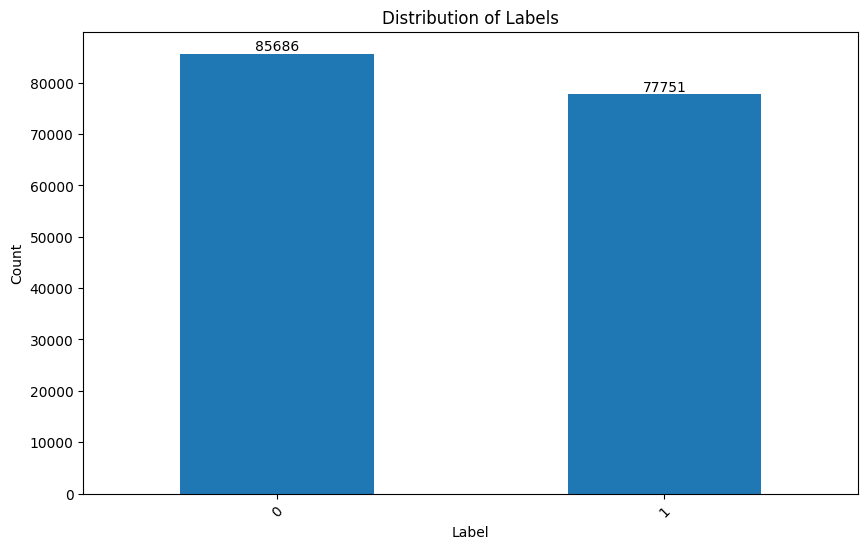

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

label_counts = cleaned_data['Label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
for i, v in enumerate(label_counts):
            plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

df_shuffled = cleaned_data.sample(frac=1, random_state=42)

# Split into train, validation, and test sets
train_df, temp_df = train_test_split(df_shuffled, test_size=val_ratio + test_ratio, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)



In [30]:
import pandas as pd
import os

def save_datasets(dataframes, names, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for i, data in enumerate(dataframes):
        file_path = os.path.join(folder_path, f"{names[i]}.csv")
        data.to_csv(file_path, index=False)
        print(f"DataFrame {names[i]} saved to {file_path}")


folder_path = "/content/drive/MyDrive/os/datasets"

save_datasets([cleaned_data, train_df, test_df, val_df], ["Cleaned dataset", "Train", "Test", "Validation"], folder_path)


DataFrame Cleaned dataset saved to /content/drive/MyDrive/os/datasets/Cleaned dataset.csv
DataFrame Train saved to /content/drive/MyDrive/os/datasets/Train.csv
DataFrame Test saved to /content/drive/MyDrive/os/datasets/Test.csv
DataFrame Validation saved to /content/drive/MyDrive/os/datasets/Validation.csv


In [ ]:
train_df.describe()

,Label
count,98062.000000
mean,0.476076
std,0.499430
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
val_df.describe()

,Label
count,32687.000000
mean,0.476397
std,0.499450
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
test_df.describe()

,Label
count,32688.000000
mean,0.473997
std,0.499331
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


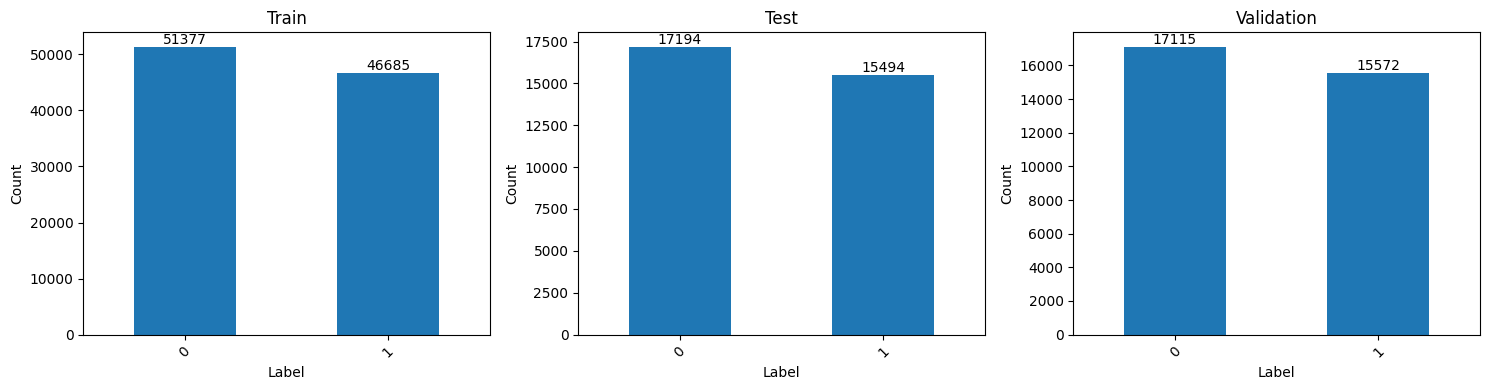

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_label_distribution(df_array, names, label_column= "Label"):

    fig, axes = plt.subplots(1, len(df_array), figsize=(len(df_array) * 5, 4))

    for idx, df in enumerate(df_array):
        label_counts = df[label_column].value_counts()
        ax = axes[idx]
        label_counts.plot(kind='bar', ax=ax)
        ax.set_title(f'{names[idx]}')
        ax.set_xlabel('Label')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

        # Add label counts above each bar
        for i, v in enumerate(label_counts):
            ax.text(i, v + 5, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_label_distribution([ train_df, test_df, val_df], ["Train", "Test", "Validation"])


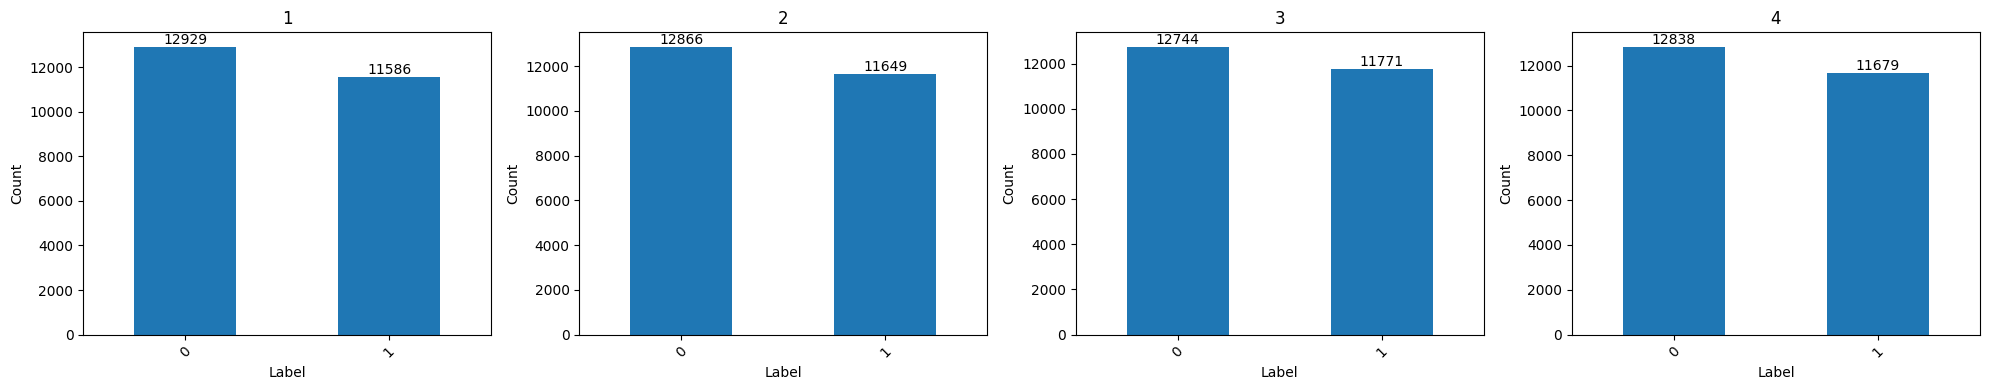

DataFrame Train_1 saved to /content/drive/MyDrive/os/datasets/Train_1.csv
DataFrame Train_2 saved to /content/drive/MyDrive/os/datasets/Train_2.csv
DataFrame Train_3 saved to /content/drive/MyDrive/os/datasets/Train_3.csv
DataFrame Train_4 saved to /content/drive/MyDrive/os/datasets/Train_4.csv


In [31]:
import pandas as pd
import numpy as np

total_length = len(train_df)

split_lengths = [total_length // 4] * 3
split_lengths.append(total_length - sum(split_lengths))

# Split the DataFrame into four parts
dfs = [train_df.iloc[start:end] for start, end in zip([0] + list(np.cumsum(split_lengths)), np.cumsum(split_lengths))]

plot_label_distribution(dfs, [1,2,3,4])
save_datasets(dfs, ["Train_1", "Train_2", "Train_3", "Train_4"], folder_path)
